<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sys
sys.path.append('../')
from DataScienceHelpers.DataCleaningOutliers import find_parameters_z_score
from DataScienceHelpers.DataCleaningOutliers import find_outliers_z_score


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [6]:
resume_data = pd.read_csv('../data/dst-3.0_16_1_hh_database.csv.zip', sep=';')
resume_data.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [7]:
resume_data

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано
...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [8]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [9]:
resume_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [10]:
def determine_education(education_and_uni):
    result = ''
    # Determine the education category based on the starting words of the column 'Образование и ВУЗ'.
    if education_and_uni.startswith('Высшее'):
        result = 'высшее'
    elif education_and_uni.startswith('Неоконченное'):
        result = 'неоконченное высшее'
    elif education_and_uni.startswith('Среднее специальное'):
        result = 'среднее специальное'
    else:
        result = 'среднее'
    return result


resume_data['Образование'] = resume_data['Образование и ВУЗ'].apply(determine_education)
resume_data.drop('Образование и ВУЗ', axis=1, inplace=True)
resume_data['Образование'].value_counts()

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
def get_gender_and_age(gender_age):
    # Get the gender and the age by first splitting the string by ',' and taking the gender
    # from the first segment and the age from the second segment.
    strs = gender_age.split(',')
    gender = strs[0][0]
    
    strs = strs[1].strip().split(' ')
    age = int(strs[0])
    
    return gender, age


resume_data[['Пол', 'Возраст']] = resume_data.apply(lambda x: get_gender_and_age(x['Пол, возраст']), axis=1, result_type='expand')
resume_data.drop('Пол, возраст', axis=1, inplace=True)
display(resume_data['Пол'].value_counts(normalize=True))
display(f'Average candidate age: {resume_data['Возраст'].mean()}')

Пол
М    0.809293
Ж    0.190707
Name: proportion, dtype: float64

'Average candidate age: 32.19674146254246'

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [12]:
def get_work_experience_months(work_experience):
    result = np.NaN
    if work_experience is not np.NaN and work_experience != 'Не указано':
        # Split by '  ' to get segements like 'Опыт работы 16 лет 10 месяцев' and split them by single words.
        experience = work_experience.split('  ')[0].split(' ')
        # Determine if the first number is followed by a year or not. Calculate accordingly.
        if experience[3][:3] in ['лет', 'год']:
            result = int(experience[2]) * 12
        else:
            result = int(experience[2])
        # Determine if there are two numbers in the segment. If yes, add the second number as months.    
        if len(experience) == 6:
            result += int(experience[4])
    return result

resume_data['Опыт работы (месяц)'] = resume_data['Опыт работы'].apply(get_work_experience_months)
resume_data.drop('Опыт работы', axis=1, inplace=True)
display(f'Median work experience in months: {resume_data['Опыт работы (месяц)'].median()}')


'Median work experience in months: 100.0'

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [13]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', \
    'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', \
    'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']


def get_location_parameters(location):
    strs = location.split(' , ')
    
    # Determine city by the first segment
    city = 'другие'
    if strs[0] in ['Москва', 'Санкт-Петербург']:
        city = strs[0]
    elif strs[0] in million_cities:
        city = 'город-миллионник'
    
    # Skip metro station if available
    strs = strs[2:] if strs[1].strip().startswith('м. ') else strs[1:]
    
    # Only for the case when the person is not ready to relocate, 
    # the corresponding segements starts with 'не'
    ready_to_relocate = False if strs[0].startswith('не') else True
    
    # If travel data is not available or for the case when the person is not ready to travel, 
    # when the corresponding segements starts with 'не'
    ready_to_travel = False if len(strs) == 1 or strs[1].startswith('не') else True
    
    return city, ready_to_relocate, ready_to_travel
    
    
resume_data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = \
    resume_data.apply(lambda x: get_location_parameters(x['Город, переезд, командировки']), axis=1, result_type='expand')
resume_data.drop('Город, переезд, командировки', axis=1, inplace=True)

display(resume_data['Город'].value_counts(normalize=True))

mask_ready_to_relocate_travel = (resume_data['Готовность к переезду']) & (resume_data['Готовность к командировкам'])
num_ready_to_relocate_travel = resume_data[mask_ready_to_relocate_travel].shape[0]
ratio_ready_to_relocate_travel = round(100 * num_ready_to_relocate_travel / resume_data.shape[0])
display(f'Percentage ready to both relocation and travels: {ratio_ready_to_relocate_travel}')

Город
Москва              0.371469
другие              0.354327
город-миллионник    0.163866
Санкт-Петербург     0.110339
Name: proportion, dtype: float64

'Percentage ready to both relocation and travels: 32'

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [14]:
employment_types = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
work_schedules = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# This function checks if a coma separated list of values has matches in a pre-defined list.
# Returns a tuple where each component is True/False based on existense of the value in the 
# passed coma separated list.
def get_list_entries(value, lst):
    return tuple(map(lambda x: x in value, lst))

resume_data[employment_types] = \
    resume_data.apply(lambda x: get_list_entries(x['Занятость'], employment_types), axis=1, result_type='expand')
resume_data[work_schedules] = \
    resume_data.apply(lambda x: get_list_entries(x['График'], work_schedules), axis=1, result_type='expand')
resume_data.drop('Занятость', axis=1, inplace=True)
resume_data.drop('График', axis=1, inplace=True)

mask_project_voluntary = (resume_data['проектная работа']) & (resume_data['волонтерство'])
num_project_voluntary = resume_data[mask_project_voluntary].shape[0]
display(f'Number of people searching for both project and voluntary work: {num_project_voluntary}')

mask_rotating_flexible = (resume_data['вахтовый метод']) & (resume_data['гибкий график'])
num_rotating_flexible = resume_data[mask_rotating_flexible].shape[0]
display(f'Number of perple searching for both rotating method and flexible schedule: {num_rotating_flexible}')

'Number of people searching for both project and voluntary work: 436'

'Number of perple searching for both rotating method and flexible schedule: 2311'

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [15]:
currencies_data = pd.read_csv('../data/ExchangeRates.csv')


In [16]:
currency_mapping = {
    'KZT': 'KZT',
    'USD': 'USD',
    'бел.руб.': 'BYN',
    'EUR': 'EUR',
    'грн.': 'UAH',
    'сум': 'UZS',
    'KGS': 'KGS',
    'AZN': 'AZN'
}

def convert_currency(salary, date):
    # The salary comes as amount and currency in the same field. I split them here.
    strs = salary.split(' ')
    amount = int(strs[0])
    currency = strs[1]
    
    result = 0
    if currency == 'руб.':
        # If currency is rouble, we don't need to do any conversion.
        result = amount
    else:
        # If currency is not rouble, map currency to a correct currency code used in the ExchangeRate.csv.
        currency = currency_mapping[currency]
        # Find the exchange rate by date and currency code.
        mask_fx = (currencies_data['date']==date) & (currencies_data['currency']==currency)
        fx_rate = currencies_data[mask_fx]
        # Include the 'proportion' column in the exchange rate.
        fx_rate = fx_rate.iloc[0]['close'] / fx_rate.iloc[0]['proportion']
        # Calculate and return the value in roubles.
        result = amount * fx_rate
    return result
    

# I considered two approaches: 1. merge the fields from the ExchangeRate.csv to the main DataFrame by 
# date and currency. 2. No merging, but rather finding an exchange rate for each record in the main 
# DataFrame. I decided to go for the option 2, because option 1 consumes more memory, which is tight
# on my machine.
currencies_data['date'] = pd.to_datetime(currencies_data['date']).dt.date
resume_data['Обновление резюме (дата)'] = pd.to_datetime(resume_data['Обновление резюме']).dt.date

resume_data['ЗП (руб)'] = \
    resume_data.apply(lambda x: convert_currency(x['ЗП'], x['Обновление резюме (дата)']), axis=1, result_type='expand')
resume_data.drop('ЗП', axis=1, inplace=True)
resume_data.drop('Обновление резюме (дата)', axis=1, inplace=True)

median_expected_salary_rub = resume_data['ЗП (руб)'].median()
display(f'Median expected salary in roubles: {median_expected_salary_rub}')

/var/folders/lx/mg62ynw52qb3k3wstjkw80gr0000gn/T/ipykernel_27073/1209043715.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  currencies_data['date'] = pd.to_datetime(currencies_data['date']).dt.date
/var/folders/lx/mg62ynw52qb3k3wstjkw80gr0000gn/T/ipykernel_27073/1209043715.py:40: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  resume_data['Обновление резюме (дата)'] = pd.to_datetime(resume_data['Обновление резюме']).dt.date


'Median expected salary in roubles: 59000.0'

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

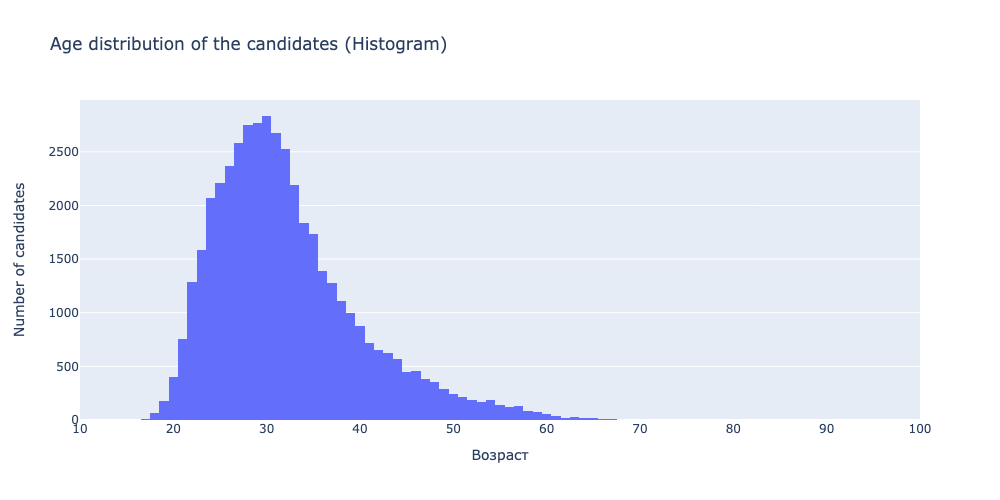

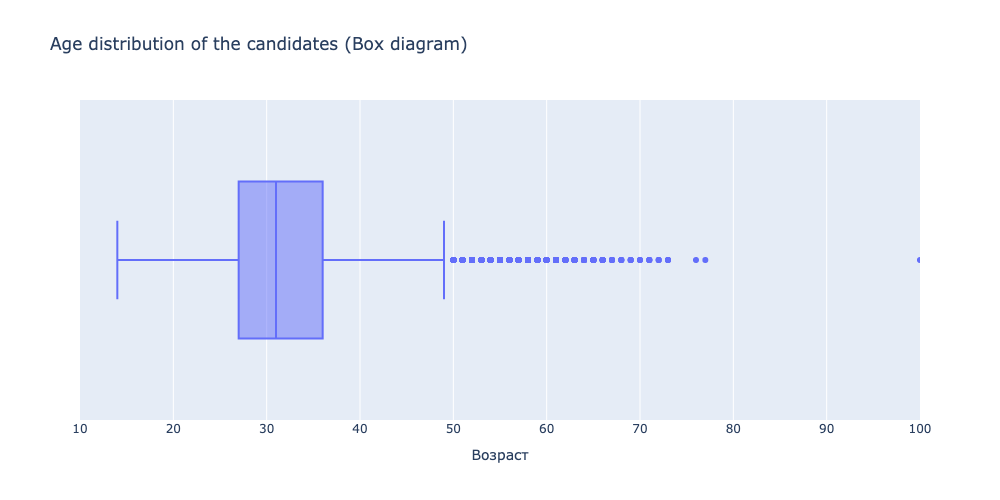

In [17]:
fig = px.histogram(
    data_frame=resume_data,
    x='Возраст',
    width=1000,
    height=500,
    title='Age distribution of the candidates (Histogram)'
).update_layout(
    yaxis_title='Number of candidates',
    xaxis_range=[10, 100]
)
fig.show('png')

fig = px.box(
    data_frame=resume_data,
    x='Возраст',
    width=1000,
    height=500,
    title='Age distribution of the candidates (Box diagram)'
).update_layout(
    xaxis_range=[10, 100]
)
fig.show('png')

The distribution mod value is 30 years old. 

Visually it is hard to precisely determine the min and max values: it looks like they are 14 and 100 years old.

The majority of the candidates belongs to the range between 27 and 36 years old.

I would see only one the value 100 years old as an abnormal value. I could imagine that some people could still search for work at the age between 70 and 80 years old, e.g. language or music teachers.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

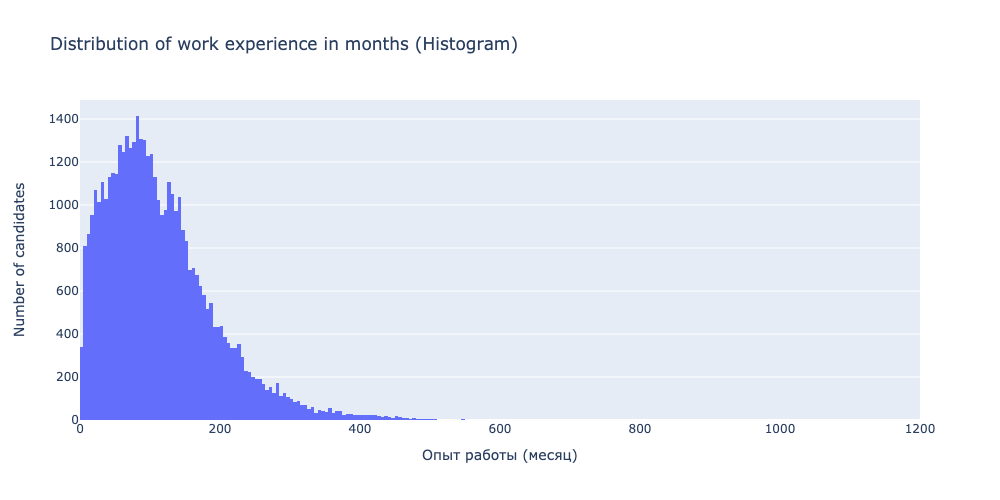

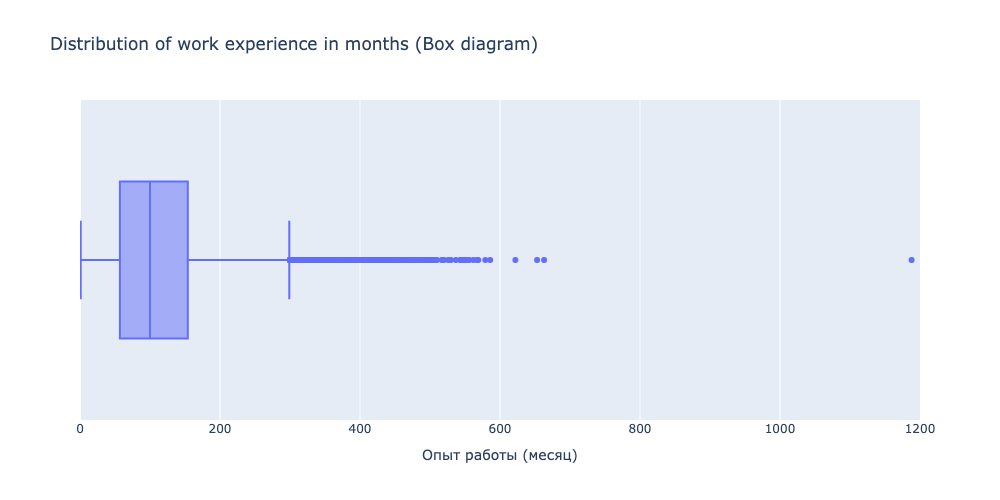

In [18]:
fig = px.histogram(
    data_frame=resume_data,
    x='Опыт работы (месяц)',
    width=1000,
    height=500,
    title='Distribution of work experience in months (Histogram)'
).update_layout(
    yaxis_title='Number of candidates',
    xaxis_range=[0, 1200]
)
fig.show('png')

fig = px.box(
    data_frame=resume_data,
    x='Опыт работы (месяц)',
    width=1000,
    height=500,
    title='Distribution of work experience in months (Box diagram)'
).update_layout(
    xaxis_range=[0, 1200]
)
fig.show('png')

The distribution mod lies between 80-84 months of work experience.

The min and max values are 0 and 1188 months of work experience.

The majority of the candidates belongs to the range between 57 and 154 months of work experience.

I would see only 1188 months as an abnormal value. The values between 600 and 700 months could be real for pensioneers seeking for a job.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


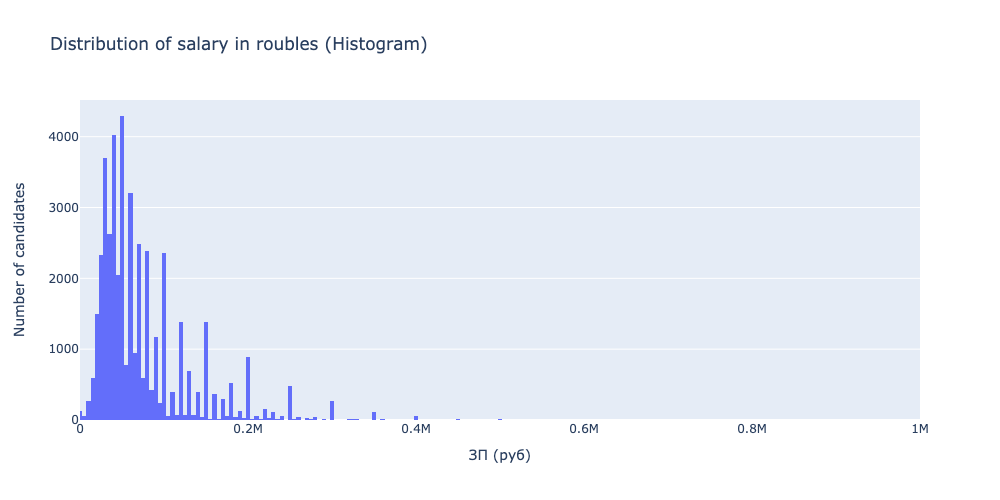

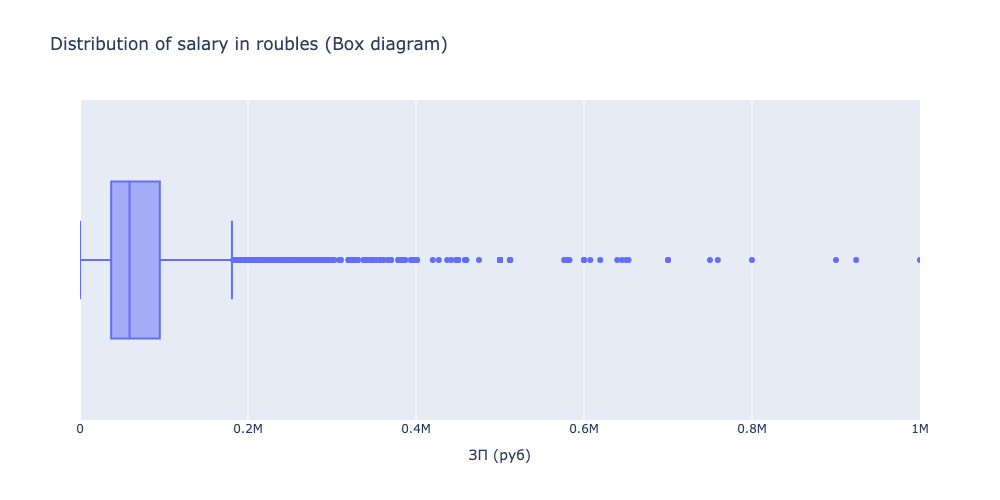

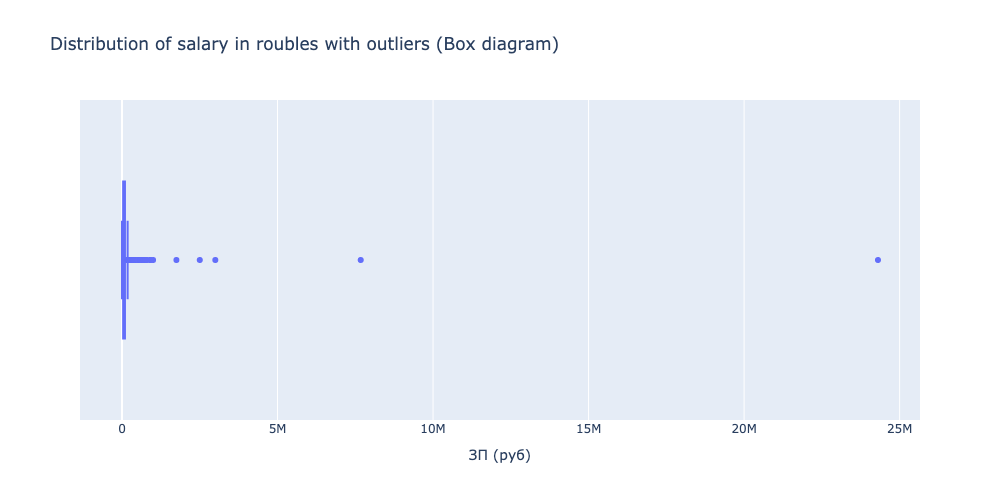

In [19]:
fig = px.histogram(
    data_frame=resume_data,
    x='ЗП (руб)',
    width=1000,
    height=500,
    title='Distribution of salary in roubles (Histogram)'
).update_layout(
    yaxis_title='Number of candidates',
    xaxis_range=[0, 1000000]
)
fig.show('png')

fig = px.box(
    data_frame=resume_data,
    x='ЗП (руб)',
    width=1000,
    height=500,
    title='Distribution of salary in roubles (Box diagram)'
).update_layout(
    xaxis_range=[0, 1000000]
)
fig.show('png')

fig = px.box(
    data_frame=resume_data,
    x='ЗП (руб)',
    width=1000,
    height=500,
    title='Distribution of salary in roubles with outliers (Box diagram)'
)
fig.show('png')

For the first two charts I have put the x-axis range between 0 and 1000000 to have a better visibility. For the third chart I did not use any restrictions for the x-axis, which allowed to see also the larger outliers.

The distribution mod lies between 47,5 and 52,9 thousand roubles.

The min and max values are 2500 and 24304880 roubles.

I am not very much familiar with the labour market in Russia, but it seems to me that everything above 5000000 is abnormal. I.e., the two values on our distribution: 7675224 and 24304880 roubles.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

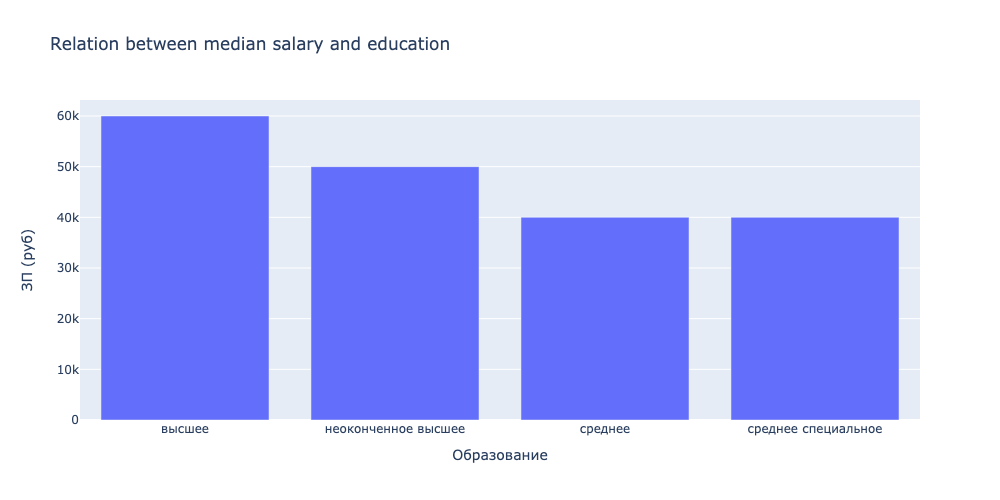

In [20]:
mask_salary_below_1m = resume_data['ЗП (руб)'] < 1000000
salary_below_1m = resume_data[mask_salary_below_1m]
salary_education = salary_below_1m.groupby(by='Образование', as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=salary_education,
    x='Образование',
    y='ЗП (руб)',
    width=1000,
    height=500,
    title='Relation between median salary and education'
)
fig.show('png')


The chart shows that the highers median salaries are achieved for candidates with a finished university degree. People with secondary or secondary professional education have the lowest salaries.

I think that it is very important to use this feature (education) in the salary forcast because it can influence the salary by about 50 %.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

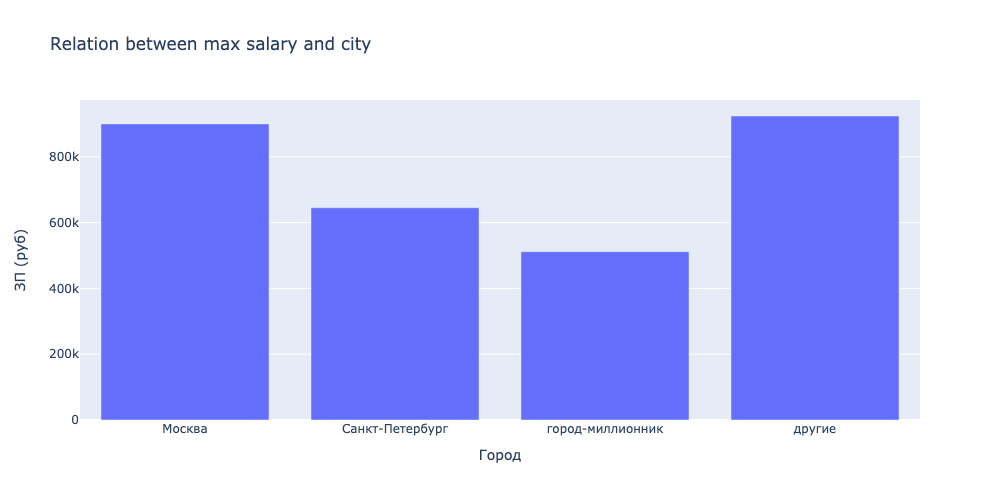

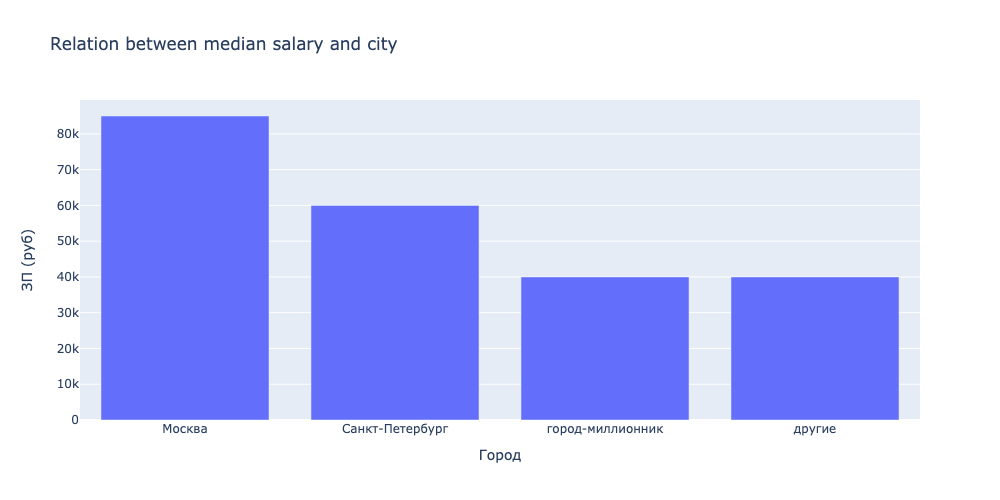

In [21]:
salary_city_max = salary_below_1m.groupby(by='Город', as_index=False)['ЗП (руб)'].max()
fig = px.bar(
    data_frame=salary_city_max,
    x='Город',
    y='ЗП (руб)',
    width=1000,
    height=500,
    title='Relation between max salary and city'
)
fig.show('png')

salary_city_median = salary_below_1m.groupby(by='Город', as_index=False)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=salary_city_median,
    x='Город',
    y='ЗП (руб)',
    width=1000,
    height=500,
    title='Relation between median salary and city'
)
fig.show('png')

I have built two charts here: 1. based on max salary and 2. based on median salary. 1. is required to answer the task 4.5. 2. is required for conclusions.

The median salary level is nearly the same for other cities and cities with 1 million population, increasing by 50 % in Saint-Petersburg and increasing by around further 40 % in Moscow.

In my opinion this feature (city) in the salary forecast, because for Moscow and Saint-Petersburg the salaries are different from the rest of the country.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

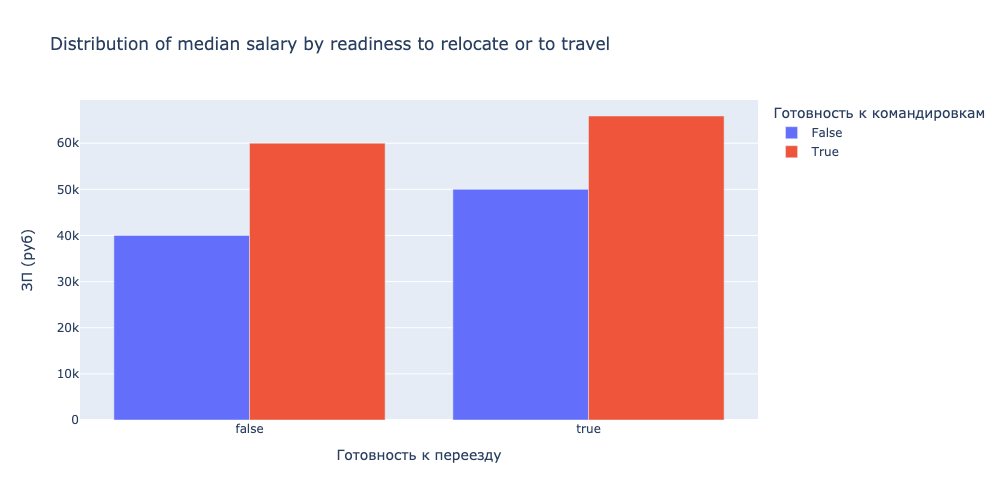

In [22]:
salary_ready_relocate_travel = \
    resume_data.groupby(by=['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=salary_ready_relocate_travel,
    x='Готовность к переезду', 
    y='ЗП (руб)',
    barmode='group',
    color='Готовность к командировкам',
    width=1000,
    height=500,
    title='Distribution of median salary by readiness to relocate or to travel'
)
fig.show('png')

I decided against a layered bar diagram here, because it would aggregate the values in the bar, making for example the total bar value for not ready to relocate to 100000, which is a confusing number. I went for a multi-bar diagram.

The chart shows that the readiness to relocate is increasing the median salary, same as the readiness to travel.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

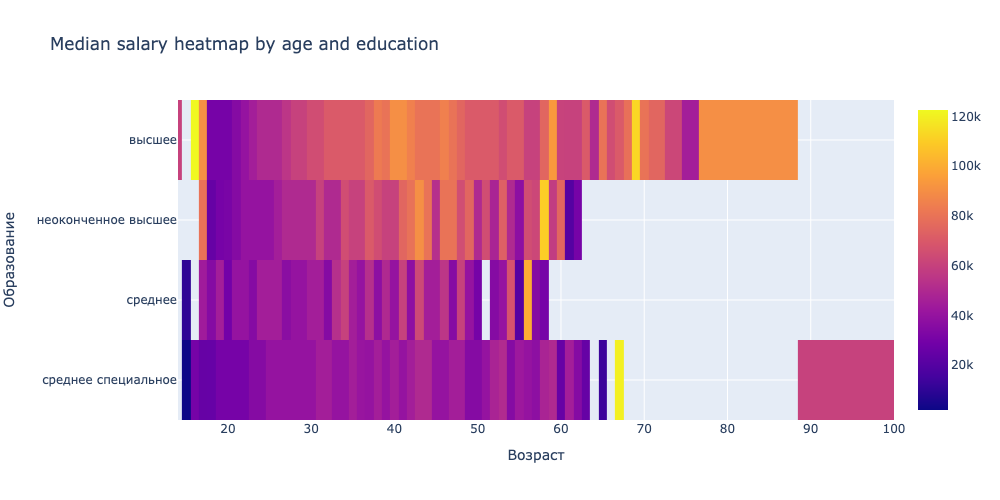

In [23]:
salary_age_education = \
    resume_data.pivot_table(values='ЗП (руб)', columns='Возраст', index='Образование', aggfunc='median')

fig = px.imshow(
    salary_age_education,
    width=1000,
    height=500,
    title='Median salary heatmap by age and education'
).update_layout(
    xaxis_range=[14, 100]
)
fig.show('png')

The data for the ages over 77 years old seems abnormal.

The chart visually shows that the candidates with the university degree have higher salaries and thier salaries grow faster. 

It is surprising that the salaries of candidates with secondary education look higher than those of candidates with secondary professional education. Basically with a lower level of education it is possible to achieve higher salaries.

Candidates with an unfinished university degree expect the salaries between those of candidates with a university degreee and with a secondary education.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

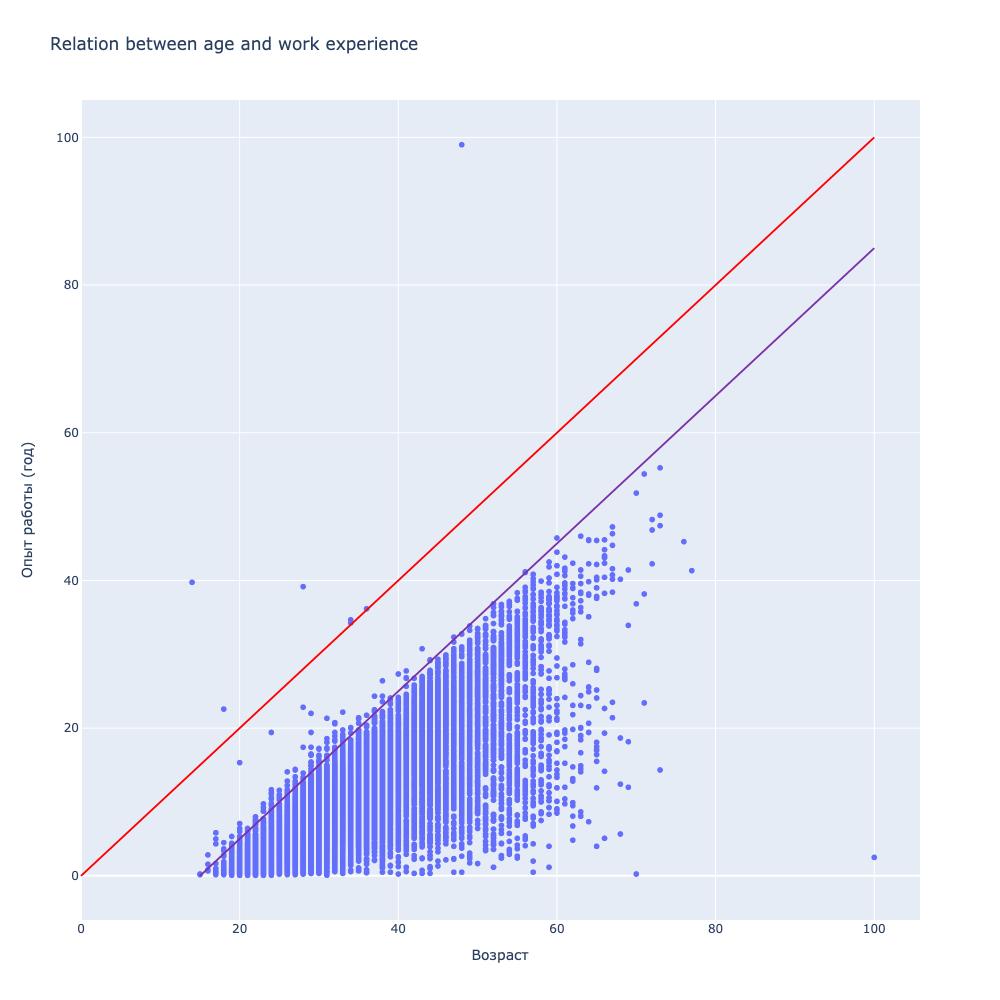

In [24]:
resume_data['Опыт работы (год)'] = resume_data['Опыт работы (месяц)'] / 12

fig = px.scatter(
    data_frame=resume_data,
    x='Возраст',
    y='Опыт работы (год)',
    width=1000,
    height=1000,
    title='Relation between age and work experience'
)
fig.add_shape(type='line', x0=0, y0=0, x1=100, y1=100, line=dict( color="#ff0000", width=2 ))
fig.add_shape(type='line', x0=15, y0=0, x1=100, y1=85, line=dict( color="#7b32a8", width=2 ))
fig.show('png')

resume_data.drop('Опыт работы (год)', axis=1, inplace=True)


The chart shows 7 definitely abnormal values, where the work experience is larger than the age. These are the dots above the red line.

I additionally drew a lila line. Dots which are above this line seem questionable to me. They mean that the candidates started their career before the age of 15 years old.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


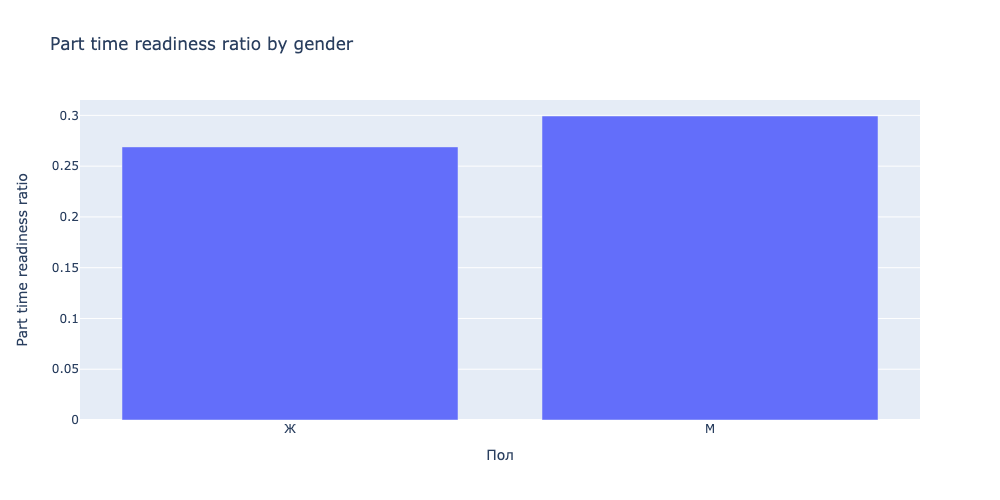

In [25]:
gender_part_time = resume_data.groupby(by='Пол', as_index=False)['частичная занятость'].agg(['sum', 'count'])
gender_part_time['gender_ratio'] = gender_part_time['sum'] / gender_part_time['count']

fig = px.bar(
    data_frame=gender_part_time,
    x='Пол',
    y='gender_ratio',
    width=1000,
    height=500,
    title='Part time readiness ratio by gender'
).update_layout(
    yaxis_title='Part time readiness ratio'
)
fig.show('png')

There is a stereotype that women tend to work part time more often than men. This happens due to the child care. Based on our date this stereotype has not been confirmed. The persentage of wemoen seeking for a part time job is lower than the percentage of men.

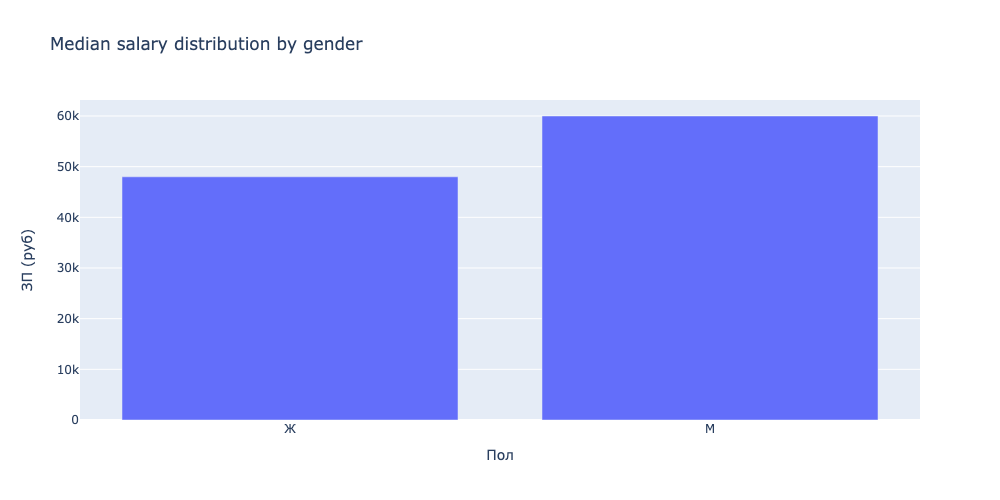

In [26]:
gender_salary = resume_data.groupby(by='Пол', as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=gender_salary,
    x='Пол',
    y='ЗП (руб)',
    width=1000,
    height=500,
    title='Median salary distribution by gender'
)
fig.show('png')


Another stereotype is that women earn less then men. This stereotype is supported by the chart above. However a more detailed research by qualification is necessary to have a more grounded opinion.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [27]:
mask_duplicates = resume_data.duplicated(subset=resume_data.columns)
duplicates = resume_data[mask_duplicates]
display(f'Found nomber of duplicates: {duplicates.shape[0]}')

resume_data = resume_data.drop_duplicates() # 158, which is a wrong answer. Correct is 155.

'Found nomber of duplicates: 158'

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [28]:
resume_data.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [29]:
mask_skip_empty = (~resume_data['Последнее/нынешнее место работы'].isnull()) & (~resume_data['Последняя/нынешняя должность'].isnull())
resume_data = resume_data[mask_skip_empty]

median_experience = resume_data['Опыт работы (месяц)'].median()
resume_data['Опыт работы (месяц)'] = resume_data['Опыт работы (месяц)'].fillna(median_experience)

mean_experience = round(resume_data['Опыт работы (месяц)'].mean())
display(f'Mean experience: {mean_experience}')


'Mean experience: 114'

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [30]:
mask_salary_outliers = (resume_data['ЗП (руб)']<1000) | (resume_data['ЗП (руб)']>1000000)
num_salary_outliers = resume_data[mask_salary_outliers].shape[0]
display(f'Number of salary outliers: {num_salary_outliers}')

resume_data = resume_data[~mask_salary_outliers]

'Number of salary outliers: 89'

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [31]:
mask_incorrect_experience = resume_data['Возраст'] < resume_data['Опыт работы (месяц)']/12
incorrect_experience = resume_data[mask_incorrect_experience]
display('Experience exceeds age:', incorrect_experience)

resume_data = resume_data[~mask_incorrect_experience]

'Experience exceeds age:'

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
4535,Технический специалист,а,а,11.04.2019 10:46,Не указано,среднее специальное,Ж,18,271.0,другие,...,True,True,False,False,False,True,False,True,False,15000.0
19351,Специалист (Junior-программист),"Русский свет, ООО",Электрик,26.04.2019 11:07,Не указано,высшее,М,28,470.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
19872,Аналитик,Kyivstar,Фахівець з опису бізнес процесів,26.04.2019 14:10,Не указано,высшее,М,34,416.0,другие,...,False,False,False,False,True,False,False,False,False,60740.5
26477,Менеджер IT-проектов,"М©й IT'M (""Информационные Технологии' Менеджм...",Основатель,08.04.2019 01:01,Не указано,высшее,М,34,411.0,Санкт-Петербург,...,True,True,True,True,True,True,True,True,True,80000.0
29098,Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,26.04.2019 09:18,Не указано,высшее,М,14,477.0,Москва,...,False,False,False,False,True,False,False,False,False,60000.0
40015,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,16.04.2019 08:09,Не указано,высшее,М,48,1188.0,город-миллионник,...,True,False,False,False,True,False,True,True,True,60000.0
43451,Руководитель отдела разработки,ЛАНИТ,Руководитель проекта,17.08.2018 12:15,Не указано,высшее,М,36,434.0,Москва,...,False,False,False,False,True,False,False,False,False,200000.0


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

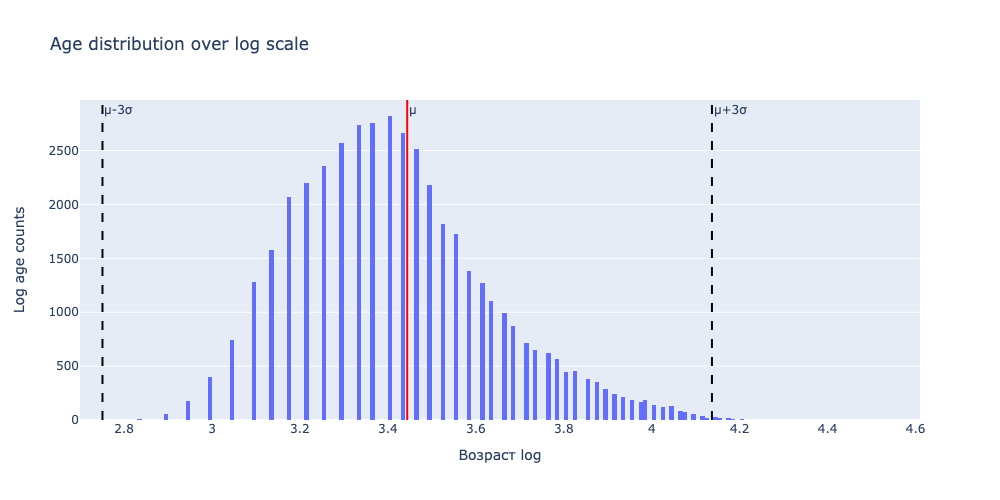

'Age distribution over log scale is right asymetric'

'The following outliers have been found'

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Возраст log
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,06.04.2019 09:13,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,False,False,False,False,True,True,True,False,10000.0,2.70805
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,09.04.2019 16:02,Не указано,среднее специальное,М,15,3.0,другие,...,False,False,False,True,False,False,False,False,2000.0,2.70805
33654,Frontend-разработчик,Freelance,Frontend-разработчик,19.04.2019 23:27,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,False,True,True,False,True,True,False,60000.0,4.60517


In [32]:
mu, lower_bound, upper_bound = find_parameters_z_score(resume_data, 'Возраст', True)

resume_data['Возраст log'] = np.log(resume_data['Возраст'])

fig = px.histogram(
    data_frame=resume_data,
    x='Возраст log',
    width=1000,
    height=500,
    title='Age distribution over log scale'
).update_layout(
    yaxis_title='Log age counts'
)
fig.add_vline(x=mu, line=dict( color='#ff0000', width=2 ), annotation_text='µ')
fig.add_vline(x=lower_bound, line=dict( color='black', width=2, dash='dash' ), annotation_text='µ-3σ')
fig.add_vline(x=upper_bound, line=dict( color='black', width=2, dash='dash' ), annotation_text='µ+3σ')
fig.show('png')

display(f'Age distribution over log scale is {'left' if resume_data['Возраст log'].skew() < 0 else 'right'} asymetric')

outliers, resume_data = find_outliers_z_score(resume_data, 'Возраст', log_scale=True, right=4)
display('The following outliers have been found', outliers)

Age distribution over log scale is right asymetric.

Three outliers have been found using the z-score method.